In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
print(" Dataset Information")
print("-" * 50)
df = pd.read_csv('data.csv')
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())

 Dataset Information
--------------------------------------------------
Dataset Shape: (4424, 1)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Attribute and Characteristics


In [ ]:
# First, let's properly parse the CSV with semicolon separator
df = pd.read_csv('data.csv', sep=';')

# Print basic information about the dataset
print("Dataset Information")
print("-" * 50)
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn Names:")
print(df.columns.tolist())

# Analyze each attribute
print("\nAttribute Analysis")
print("-" * 50)
for column in df.columns:
    print(f"\nAttribute: {column}")
    print(f"Data Type: {df[column].dtype}")
    
    # Calculate missing values
    missing_percent = (df[column].isnull().sum() / len(df)) * 100
    print(f"Missing Values: {missing_percent:.2f}%")
    
    # For numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
        print(f"Mean: {df[column].mean():.2f}")
        print(f"Median: {df[column].median():.2f}")
        print(f"Standard Deviation: {df[column].std():.2f}")
        
        # Check for outliers using IQR method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"Number of outliers: {len(outliers)}")
        print(f"Outlier percentage: {(len(outliers)/len(df))*100:.2f}%")
    
    # For categorical columns
    else:
        unique_values = df[column].nunique()
        print(f"Number of unique values: {unique_values}")
        if unique_values < 10:  # Only show value counts if not too many unique values
            print("\nValue Counts:")
            print(df[column].value_counts())
    
    print("-" * 30)

# Create visualizations for numeric columns
import matplotlib.pyplot as plt  # Add this import at the top

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
    print("\nCreating visualizations for numeric columns...")
    for column in numeric_columns:
        # Reduced figure size from (10, 6) to (6, 4)
        plt.figure(figsize=(6, 4))
        plt.hist(df[column].dropna(), bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()  # Added to prevent label cutoff
        plt.show()
        
        # Reduced boxplot size from (10, 6) to (6, 3)
        plt.figure(figsize=(6, 3))
        plt.boxplot(df[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.tight_layout()  # Added to prevent label cutoff
        plt.show()

In [4]:
# Load the data with correct separator
df = pd.read_csv('data.csv', sep=';')

print("Original Target distribution:")
print(df['Target'].value_counts())

# Data cleaning steps
# 1. Combine 'Enrolled' and 'Graduate'
df['Target'] = df['Target'].replace({'Enrolled': 'Graduate'})

print("\nUpdated Target distribution after combining 'Enrolled' and 'Graduate':")
print(df['Target'].value_counts())

# 2. Handle missing values (if any)
df = df.fillna(df.mean(numeric_only=True))

# 3. Remove any duplicates
df = df.drop_duplicates()

# 4. Save the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)
print("\nNew cleaned dataset saved as 'cleaned_data.csv'")

# Create numerical target for analysis
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}
df['Target_numerical'] = df['Target'].map(target_mapping)

print("\nNumerical target distribution:")
print(df['Target_numerical'].value_counts())

Original Target distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Updated Target distribution after combining 'Enrolled' and 'Graduate':
Target
Graduate    3003
Dropout     1421
Name: count, dtype: int64

New cleaned dataset saved as 'cleaned_data.csv'

Numerical target distribution:
Target_numerical
1    3003
0    1421
Name: count, dtype: int64


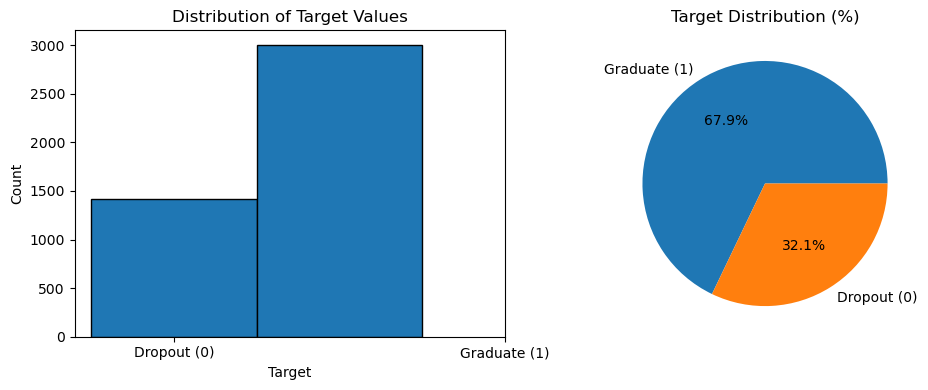


Target Distribution:
Target_numerical
1    3003
0    1421
Name: count, dtype: int64


In [5]:
# Create numerical target
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}
df['Target_numerical'] = df['Target'].map(target_mapping)

# Now create visualization with numerical values
plt.figure(figsize=(10, 4))

# Distribution plot (Histogram)
plt.subplot(1, 2, 1)
plt.hist(df['Target_numerical'], bins=2, edgecolor='black', align='left')
plt.xticks([0, 1], ['Dropout (0)', 'Graduate (1)'])
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
target_counts = df['Target_numerical'].value_counts()
plt.pie(target_counts.values, labels=['Graduate (1)', 'Dropout (0)'], autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()

# Print the actual counts
print("\nTarget Distribution:")
print(df['Target_numerical'].value_counts())

COMBINE ENROLLED AND GRADUATE 


b. Data cleaning.  
i. Fix or remove outliers  
ii. Filling missing values or drop their rows if it is necessary.  


MAKE A CHART OF NATIONALITY AS SEE WHICH ONES TO DROP OR NOT 

<Figure size 1200x600 with 0 Axes>

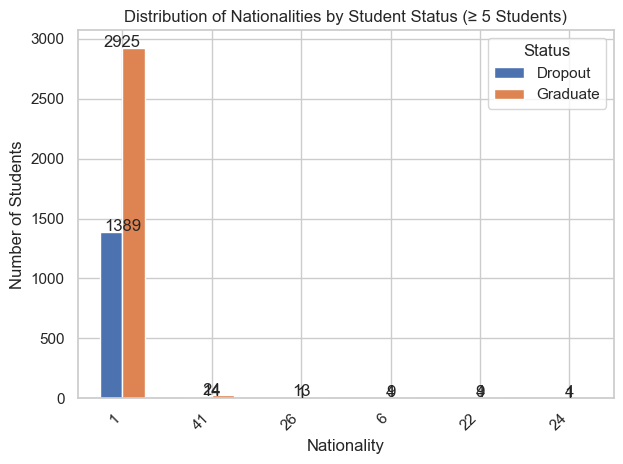


Detailed Distribution by Nationality (≥ 5 Students):
Target       Dropout  Graduate
Nacionality                   
1               1389      2925
41                14        24
26                 1        13
6                  4         9
22                 4         9
24                 1         4

Number of nationalities removed (< 5 students): 15
Percentage of nationalities removed: 71.43%

Total students in filtered data: 4397 out of 4424
Percentage of students retained: 99.39%


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation of Nacionality and Target
nationality_target = pd.crosstab(df['Nacionality'], df['Target'])

# Calculate total students per nationality
nationality_target['Total'] = nationality_target['Dropout'] + nationality_target['Graduate']

# Filter out nationalities with fewer than 5 instances
nationality_target_filtered = nationality_target[nationality_target['Total'] >= 5]

# Remove the Total column after filtering
nationality_target_filtered = nationality_target_filtered.drop('Total', axis=1)

# Sort by total count
nationality_target_filtered = nationality_target_filtered.sort_values(by=['Graduate', 'Dropout'], ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
nationality_target_filtered.plot(kind='bar', stacked=False)
plt.title('Distribution of Nationalities by Student Status (≥ 5 Students)')
plt.xlabel('Nationality')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()

# Add count labels on top of each bar
for i, (index, row) in enumerate(nationality_target_filtered.iterrows()):
    plt.text(i, row['Graduate'] + 5, str(row['Graduate']), ha='center')
    plt.text(i, row['Dropout'] + 5, str(row['Dropout']), ha='center')

plt.show()

# Print the actual numbers
print("\nDetailed Distribution by Nationality (≥ 5 Students):")
print(nationality_target_filtered)

# Print how many nationalities were removed
removed_count = len(nationality_target) - len(nationality_target_filtered)
print(f"\nNumber of nationalities removed (< 5 students): {removed_count}")
print(f"Percentage of nationalities removed: {(removed_count/len(nationality_target))*100:.2f}%")

# Print the total students represented in the filtered data
total_students_filtered = nationality_target_filtered['Graduate'].sum() + nationality_target_filtered['Dropout'].sum()
total_students_original = nationality_target['Graduate'].sum() + nationality_target['Dropout'].sum()
print(f"\nTotal students in filtered data: {total_students_filtered} out of {total_students_original}")
print(f"Percentage of students retained: {(total_students_filtered/total_students_original)*100:.2f}%")

feature selection


In [7]:
# First, install scikit-learn
!pip install scikit-learn

# Then run your feature selection code again

Unique values in Target column:
['Dropout' 'Graduate']

Value counts after mapping:
Target_numerical
1    3003
0    1421
Name: count, dtype: int64

Correlation Analysis:

Correlation with Target:
Target_numerical                    1.000000
Curricular units 2nd sem (grade)    0.571792
Curricular units 1st sem (grade)    0.480669
Scholarship holder_1                0.245354
Debtor_0                            0.229407
Course_9500                         0.163815
Displaced_1                         0.107232
Course_9238                         0.087361
Course_9070                         0.047474
Course_9085                         0.033295
Nacionality_26                      0.030139
Nacionality_11                      0.017919
Nacionality_2                       0.014629
Nacionality_62                      0.014629
Nacionality_25                      0.014629
International_1                     0.010360
Nacionality_32                      0.010343
Nacionality_108                     0.0

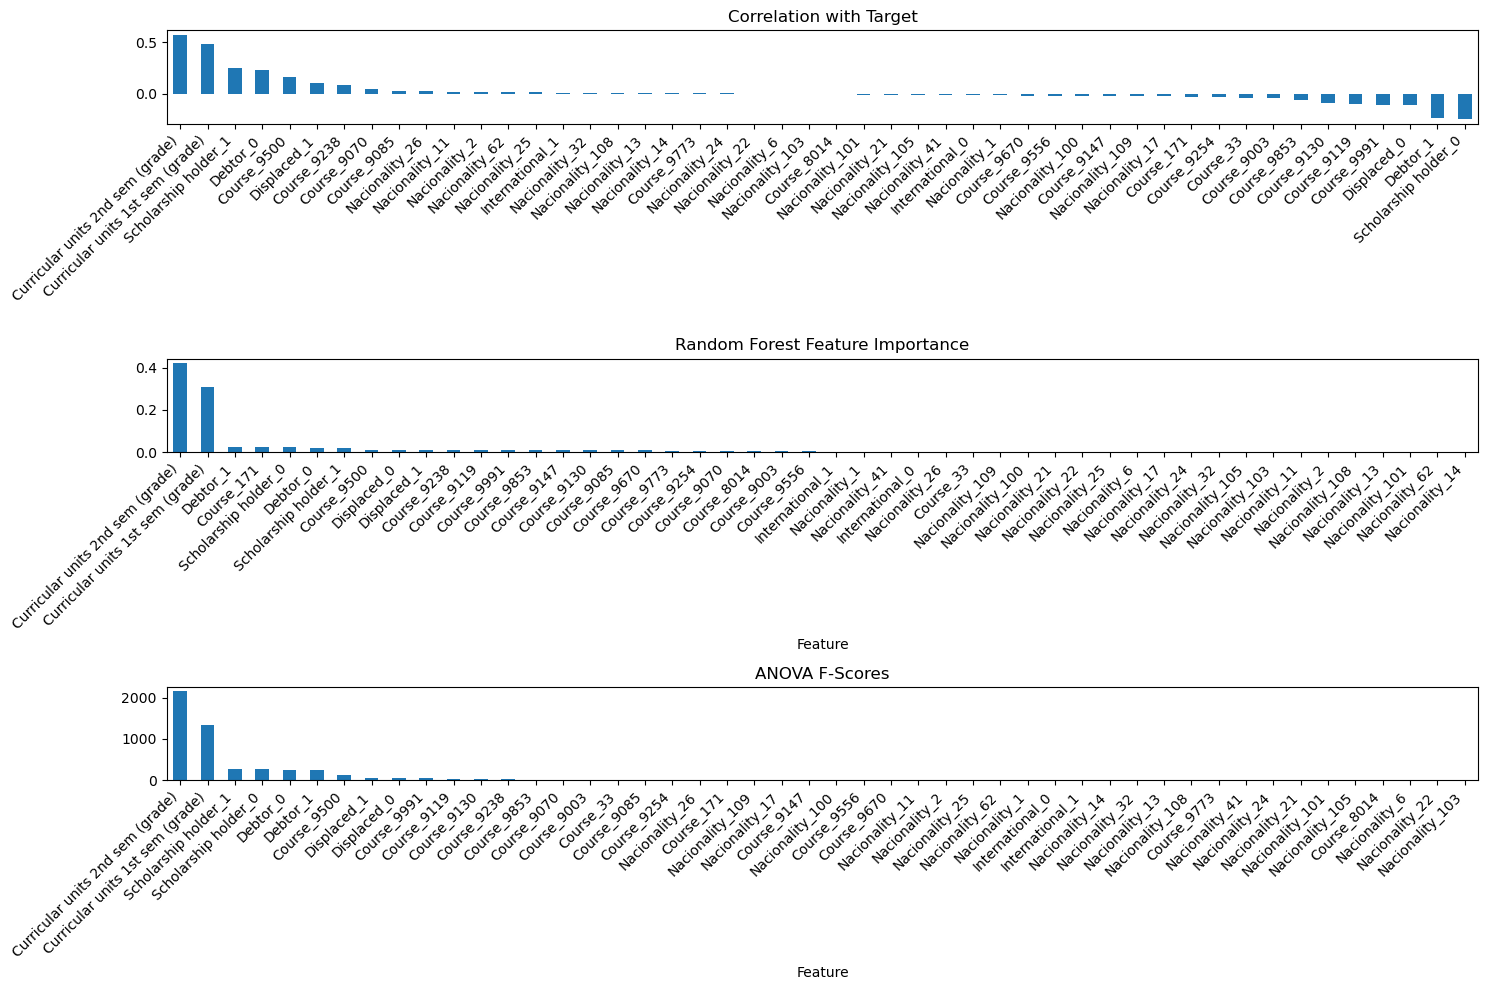


Summary of Most Important Features:
Based on all three methods, the most important features are:

Top 5 features according to Correlation:
Target_numerical                    1.000000
Curricular units 2nd sem (grade)    0.571792
Curricular units 1st sem (grade)    0.480669
Scholarship holder_1                0.245354
Debtor_0                            0.229407
Name: Target_numerical, dtype: float64

Top 5 features according to Random Forest:
Feature
Curricular units 2nd sem (grade)    0.422883
Curricular units 1st sem (grade)    0.311207
Debtor_1                            0.025715
Course_171                          0.025100
Scholarship holder_0                0.024377
Name: Importance, dtype: float64

Top 5 features according to ANOVA:
Feature
Curricular units 2nd sem (grade)    2148.055485
Curricular units 1st sem (grade)    1328.644788
Scholarship holder_1                 283.249150
Scholarship holder_0                 283.249150
Debtor_0                             245.647627
Na

In [8]:
# First, let's see the unique values in the Target column
print("Unique values in Target column:")
print(df['Target'].unique())

# Map categorical values to numerical values
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# Select the features you specified, excluding mother's and father's qualifications
selected_features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Create a new dataframe with only the selected features and target
df_features = df[selected_features + ['Target_numerical']].copy()

# Convert categorical features to numerical using one-hot encoding
df_features = pd.get_dummies(df_features, columns=[
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor'
])

# Split the data into features and target
X = df_features.drop('Target_numerical', axis=1)
y = df_features['Target_numerical']

# Method 1: Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = df_features.corr()
target_correlations = correlation_matrix['Target_numerical'].sort_values(ascending=False)
print("\nCorrelation with Target:")
print(target_correlations)

# Method 2: Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importances)

# Method 3: ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif

# Apply ANOVA
selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)

# Get ANOVA scores
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values('F-Score', ascending=False)

print("\nANOVA F-Scores:")
print(anova_scores)

# Visualize the results
plt.figure(figsize=(15, 10))

# Plot Correlation
plt.subplot(3, 1, 1)
target_correlations.drop('Target_numerical').plot(kind='bar')
plt.title('Correlation with Target')
plt.xticks(rotation=45, ha='right')

# Plot Random Forest Importance
plt.subplot(3, 1, 2)
feature_importances.set_index('Feature')['Importance'].plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')

# Plot ANOVA Scores
plt.subplot(3, 1, 3)
anova_scores.set_index('Feature')['F-Score'].plot(kind='bar')
plt.title('ANOVA F-Scores')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary of most important features
print("\nSummary of Most Important Features:")
print("Based on all three methods, the most important features are:")
for method, df in [
    ('Correlation', target_correlations),
    ('Random Forest', feature_importances.set_index('Feature')['Importance']),
    ('ANOVA', anova_scores.set_index('Feature')['F-Score'])
]:
    print(f"\nTop 5 features according to {method}:")
    print(df.head(5))

LOOK AT THE GRAPH BY CORRELATION WHICH ONES COMPARE 
LOOK AT K-SQUARE 
LOOK AT COURSE AND SEE IF THEY CHANGE 

Available columns:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Tar

<Figure size 1400x800 with 0 Axes>

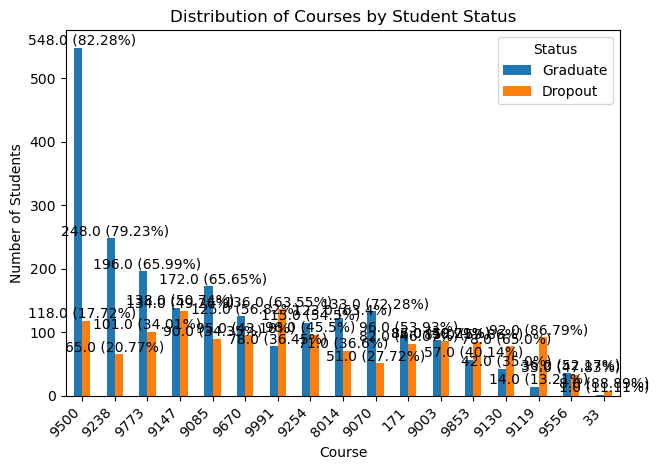


Detailed Course Statistics:

Course Distribution (sorted by total students):
Target  Graduate  Dropout  Total  Graduate %  Dropout %
Course                                                 
9500         548      118    666       82.28      17.72
9238         248       65    313       79.23      20.77
9773         196      101    297       65.99      34.01
9147         138      134    272       50.74      49.26
9085         172       90    262       65.65      34.35
9670         125       95    220       56.82      43.18
9991          78      136    214       36.45      63.55
9254         115       96    211       54.50      45.50
8014         123       71    194       63.40      36.60
9070         133       51    184       72.28      27.72
171           96       82    178       53.93      46.07
9003          87       86    173       50.29      49.71
9853          57       85    142       40.14      59.86
9130          42       78    120       35.00      65.00
9119          14       92 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's reload the data with the correct separator
df = pd.read_csv('data.csv', sep=';')

# Clean the column names
df.columns = df.columns.str.strip()

# Print the cleaned column names to verify
print("Available columns:")
print(df.columns.tolist())

# Create a cross-tabulation of Course and Target
course_target = pd.crosstab(df['Course'], df['Target'])

# Calculate percentages
course_target['Total'] = course_target['Graduate'] + course_target['Dropout']
course_target['Graduate %'] = (course_target['Graduate'] / course_target['Total'] * 100).round(2)
course_target['Dropout %'] = (course_target['Dropout'] / course_target['Total'] * 100).round(2)

# Sort by total count
course_target = course_target.sort_values(by='Total', ascending=False)

# Create the plot
plt.figure(figsize=(14, 8))
ax = course_target[['Graduate', 'Dropout']].plot(kind='bar', stacked=False)
plt.title('Distribution of Courses by Student Status')
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()

# Add count labels and course names
for i, (index, row) in enumerate(course_target.iterrows()):
    # Add Graduate count
    plt.text(i, row['Graduate'] + 5, f"{row['Graduate']} ({row['Graduate %']}%)", ha='center')
    # Add Dropout count
    plt.text(i, row['Dropout'] + 5, f"{row['Dropout']} ({row['Dropout %']}%)", ha='center')

plt.show()

# Print detailed statistics
print("\nDetailed Course Statistics:")
print("\nCourse Distribution (sorted by total students):")
print(course_target[['Graduate', 'Dropout', 'Total', 'Graduate %', 'Dropout %']])

# Calculate overall statistics
print("\nOverall Statistics:")
print(f"Total number of courses: {len(course_target)}")
print(f"Average graduation rate: {course_target['Graduate %'].mean():.2f}%")
print(f"Average dropout rate: {course_target['Dropout %'].mean():.2f}%")


d. Perform feature engineering, such as discretize continuous features,  decompose/aggregate features (*)  


In [10]:
# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')
# Discretize continuous features
# Example: Discretize 'Curricular units 1st sem (grade)' and 'Curricular units 2nd sem (grade)'
df_cleaned['Curricular units 1st sem (grade)'] = pd.cut(
    df_cleaned['Curricular units 1st sem (grade)'],
    bins=[0, 10, 15, 20],
    labels=['Low', 'Medium', 'High']
)

df_cleaned['Curricular units 2nd sem (grade)'] = pd.cut(
    df_cleaned['Curricular units 2nd sem (grade)'],
    bins=[0, 10, 15, 20],
    labels=['Low', 'Medium', 'High']
)

# Aggregate features
# Example: Create a new feature 'Total Grade' by summing the grades
df_cleaned['Total Grade'] = (
    df_cleaned['Curricular units 1st sem (grade)'].cat.codes +
    df_cleaned['Curricular units 2nd sem (grade)'].cat.codes
)

# Decompose features
# Example: Split 'Course' into multiple binary features using one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['Course'])

# Print the transformed dataframe
print("\nTransformed DataFrame:")
print(df_cleaned.head())

# Save the engineered dataset
df_cleaned.to_csv('engineered_data.csv', index=False)
print("\nEngineered dataset saved as 'engineered_data.csv'")


Transformed DataFrame:
   Marital status  Application mode  Application order  \
0               1                17                  5   
1               1                15                  1   
2               1                 1                  5   
3               1                17                  2   
4               2                39                  1   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1    

Scaling Standardized features


In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

# Check if 'Total Grade' needs to be created
if 'Total Grade' not in df_cleaned.columns:
    # Example: Create 'Total Grade' by summing two grade columns
    df_cleaned['Total Grade'] = (
        df_cleaned['Curricular units 1st sem (grade)'] +
        df_cleaned['Curricular units 2nd sem (grade)']
    )

# Define the features to scale
features_to_scale = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Total Grade'
]

# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df_cleaned[features_to_scale] = min_max_scaler.fit_transform(df_cleaned[features_to_scale])

# Print the scaled features
print("\nMin-Max Scaled Features:")
print(df_cleaned[features_to_scale].head())


Min-Max Scaled Features:
   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                          0.000000                          0.000000   
1                          0.741722                          0.735897   
2                          0.000000                          0.000000   
3                          0.711447                          0.667692   
4                          0.653422                          0.700000   

   Total Grade  
0     0.000000  
1     0.756596  
2     0.000000  
3     0.706330  
4     0.692786  


Decision tree (Naive bayes)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# --- 1. Load Data ---
try:
    df = pd.read_csv('cleaned_data.csv')
    print("Actual columns in CSV:", df.columns.tolist())
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_data_no_enrolled.csv' not found. Please ensure it's in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred loading the CSV: {e}")
    exit()

# --- 2. Select Features and Target ---
# Use the exact column names from the CSV
feature_cols = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]
target_col = 'Target'

# Map categorical values to numerical values
# Now we only have 'Dropout' and 'Graduate'
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# Check if all specified columns exist in the DataFrame
required_cols = feature_cols + [target_col]
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Error: The following required columns are missing from the CSV: {missing_cols}")
    exit()

# Create a new DataFrame with only the selected columns
df_selected = df[required_cols].copy()

# --- 3. Inspect Data ---
print("\nSelected Data Info:")
df_selected.info()

# Check unique values of the target variable
print(f"\nUnique values in target column ('{target_col}'):")
print(df_selected[target_col].unique())
print(df_selected[target_col].value_counts())

# Identify categorical and numerical features
categorical_features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor'
]

# Check which categorical features actually exist in the feature_cols list
categorical_features_in_data = [col for col in categorical_features if col in feature_cols]

numerical_features = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Check which numerical features actually exist in the feature_cols list
numerical_features_in_data = [col for col in numerical_features if col in feature_cols]

print("\nIdentified Categorical Features:", categorical_features_in_data)
print("Identified Numerical Features:", numerical_features_in_data)

# Check for missing values in selected columns
print("\nMissing values per column:")
print(df_selected.isnull().sum())

# Basic handling: Fill missing numerical with median, categorical with mode
for col in numerical_features_in_data:
    if df_selected[col].isnull().any():
        median_val = df_selected[col].median()
        df_selected[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

for col in categorical_features_in_data:
    if df_selected[col].isnull().any():
        mode_val = df_selected[col].mode()[0]
        df_selected[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

# --- 4. Preprocess Data ---
X = df_selected[feature_cols]
y = df['Target_numerical']  # Use the numerical target

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_in_data),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_in_data)
    ],
    remainder='drop'
)

# --- 5. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")

# --- 6. Create and Train Pipeline ---
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GaussianNB())])

print("\nTraining the Gaussian Naive Bayes model...")
pipeline.fit(X_train, y_train)
print("Training complete.")

# --- 7. Predict ---
print("\nMaking predictions on the test set...")
y_pred = pipeline.predict(X_test)

# --- 8. Evaluate ---
print("\n--- Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
labels = np.unique(np.concatenate((y_test, y_pred)))
print(confusion_matrix(y_test, y_pred, labels=labels))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

Actual columns in CSV: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'

Decison Tree

Actual columns in CSV: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'

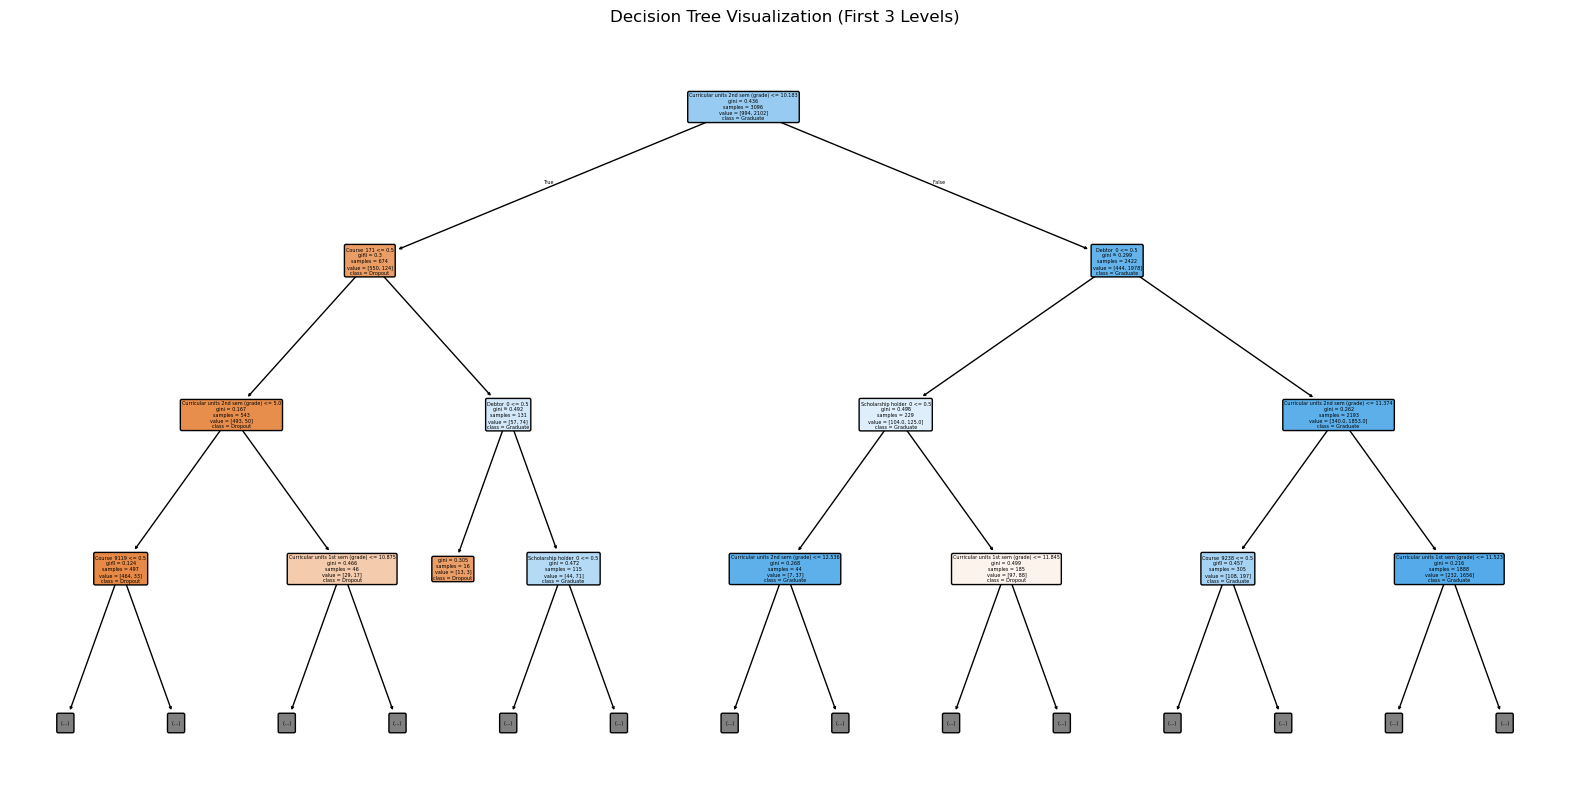

<Figure size 1200x600 with 0 Axes>

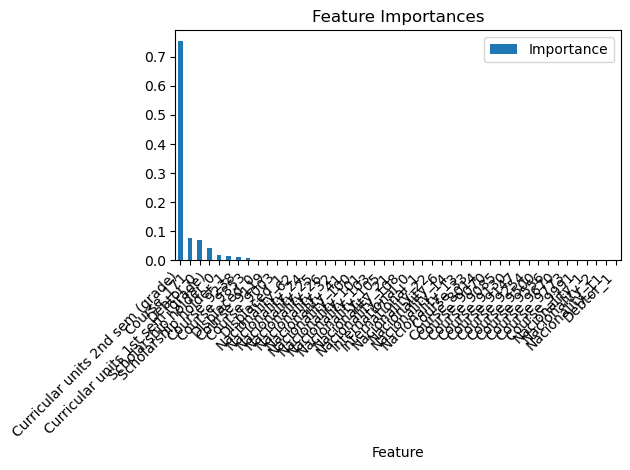

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
try:
    df = pd.read_csv('cleaned_data.csv')
    print("Actual columns in CSV:", df.columns.tolist())
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'cleaned_data_no_enrolled.csv' not found. Please ensure it's in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred loading the CSV: {e}")
    exit()

# --- 2. Select Features and Target ---
# Use only the specified columns, excluding mother's and father's qualifications
feature_cols = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]
target_col = 'Target'

# Map categorical values to numerical values
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# Check if all specified columns exist in the DataFrame
required_cols = feature_cols + [target_col]
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Error: The following required columns are missing from the CSV: {missing_cols}")
    exit()

# Create a new DataFrame with only the selected columns
df_selected = df[required_cols].copy()

# --- 3. Inspect Data ---
print("\nSelected Data Info:")
df_selected.info()

# Check unique values of the target variable
print(f"\nUnique values in target column ('{target_col}'):")
print(df_selected[target_col].unique())
print(df_selected[target_col].value_counts())

# Identify categorical and numerical features
categorical_features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    'Displaced',
    'Debtor'
]

# Check which categorical features actually exist in the feature_cols list
categorical_features_in_data = [col for col in categorical_features if col in feature_cols]

numerical_features = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Check which numerical features actually exist in the feature_cols list
numerical_features_in_data = [col for col in numerical_features if col in feature_cols]

print("\nIdentified Categorical Features:", categorical_features_in_data)
print("Identified Numerical Features:", numerical_features_in_data)

# Check for missing values in selected columns
print("\nMissing values per column:")
print(df_selected.isnull().sum())

# Basic handling: Fill missing numerical with median, categorical with mode
for col in numerical_features_in_data:
    if df_selected[col].isnull().any():
        median_val = df_selected[col].median()
        df_selected[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

for col in categorical_features_in_data:
    if df_selected[col].isnull().any():
        mode_val = df_selected[col].mode()[0]
        df_selected[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

# --- 4. Preprocess Data ---
X = df_selected[feature_cols]
y = df['Target_numerical']  # Use the numerical target

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_in_data),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_in_data)
    ],
    remainder='drop'
)

# --- 5. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")

# --- 6. Create and Train Decision Tree ---
# Create a pipeline with preprocessing and decision tree
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=5,  # Limit tree depth for better interpretability
        min_samples_split=20,  # Minimum number of samples required to split a node
        min_samples_leaf=10,  # Minimum number of samples required at each leaf node
        random_state=42
    ))
])

print("\nTraining the Decision Tree model...")
dt_pipeline.fit(X_train, y_train)
print("Training complete.")

# --- 7. Predict ---
print("\nMaking predictions on the test set...")
y_pred = dt_pipeline.predict(X_test)

# --- 8. Evaluate ---
print("\n--- Evaluation Results ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
labels = np.unique(np.concatenate((y_test, y_pred)))
print(confusion_matrix(y_test, y_pred, labels=labels))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

# --- 9. Feature Importance ---
# Get feature names after one-hot encoding
feature_names = (numerical_features_in_data + 
                list(dt_pipeline.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .get_feature_names_out(categorical_features_in_data)))

# Get feature importances
importances = dt_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# --- 10. Visualize the Decision Tree ---
# Get the decision tree from the pipeline
dt_model = dt_pipeline.named_steps['classifier']

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=feature_names,
          class_names=['Dropout', 'Graduate'],
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for better visualization
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# --- 11. Plot Feature Importances ---
plt.figure(figsize=(12, 6))
feature_importance_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

make a new decison tree for course and target 

Course Categories:
Category 0: Course 9500
Category 1: Course 9147
Category 2: Course 9238
Category 3: Course 9085
Category 4: Course 9773
Category 5: Course 9670
Category 6: Course 9991
Category 7: Course 9254
Category 8: Course 9070
Category 9: Course 171
Category 10: Course 8014
Category 11: Course 9003
Category 12: Course 9853
Category 13: Course 9119
Category 14: Course 9130
Category 15: Course 9556
Category 16: Course 33


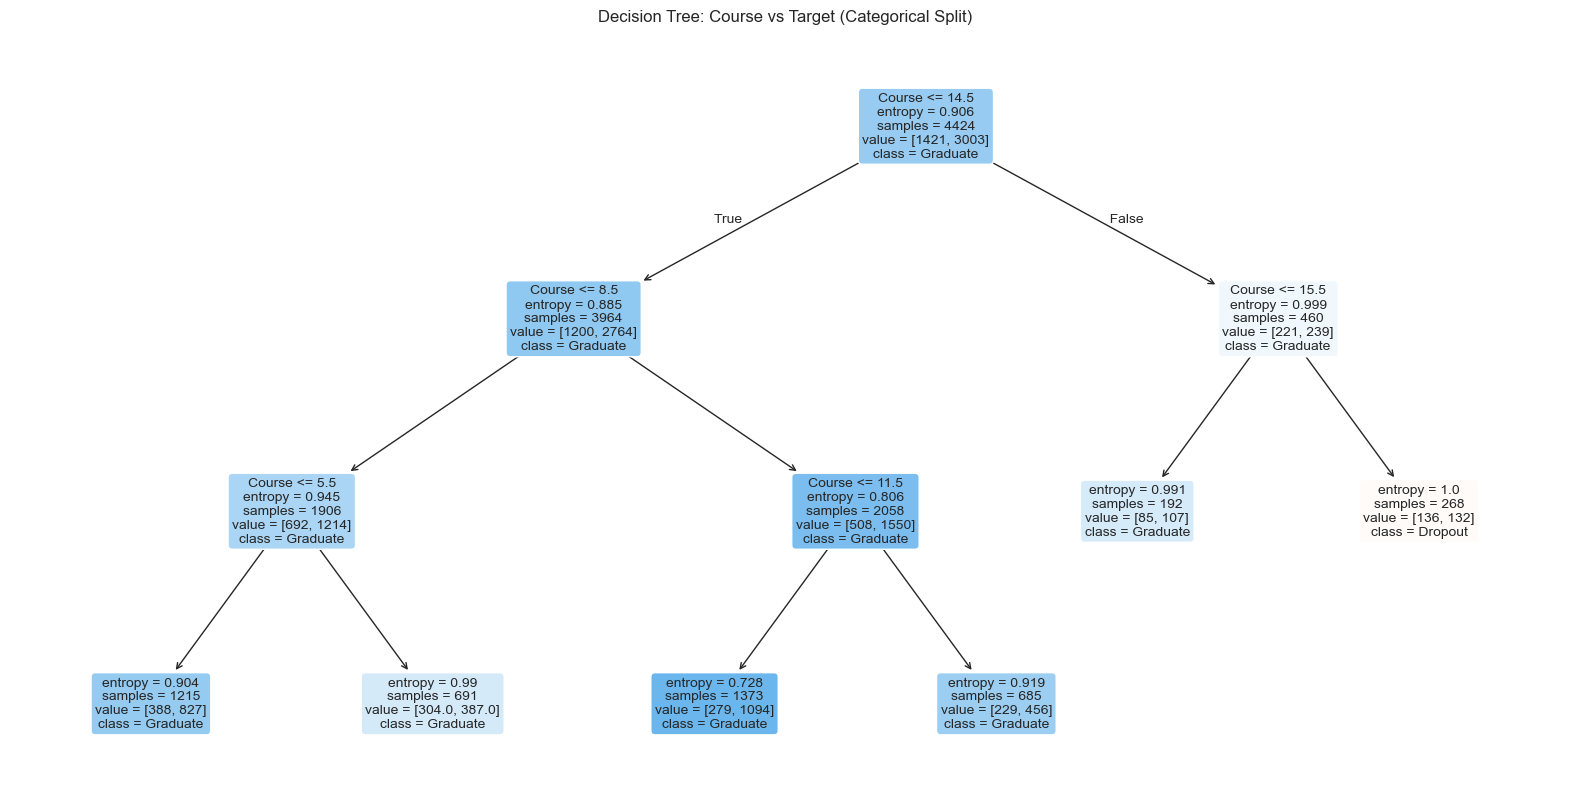


Feature importance of Course: 1.000
Model accuracy: 0.680


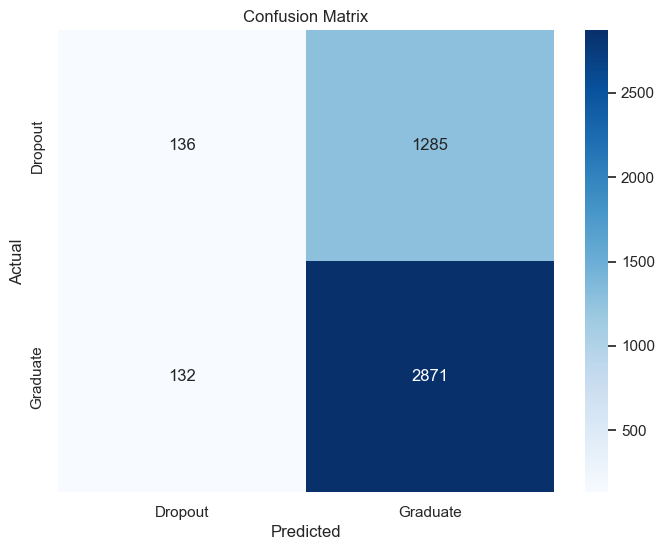


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.51      0.10      0.16      1421
    Graduate       0.69      0.96      0.80      3003

    accuracy                           0.68      4424
   macro avg       0.60      0.53      0.48      4424
weighted avg       0.63      0.68      0.60      4424



<Figure size 1500x800 with 0 Axes>

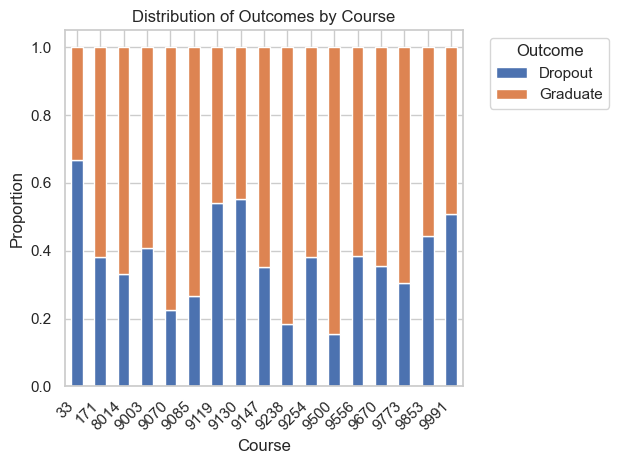


Detailed Course Analysis:

Courses Ranked by Dropout Rate:
        Total_Students  Dropout_Count  Graduate_Count  Dropout_Rate  \
Course                                                                
33                  12              8               4         0.667   
9130               141             78              63         0.553   
9119               170             92              78         0.541   
9991               268            136             132         0.507   
9853               192             85             107         0.443   
9003               210             86             124         0.410   
9556                86             33              53         0.384   
171                215             82             133         0.381   
9254               252             96             156         0.381   
9670               268             95             173         0.354   
9147               380            134             246         0.353   
8014             

In [22]:
# Import necessary libraries for decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a mapping of course codes to categorical values
course_mapping = df['Course'].value_counts().index
print("Course Categories:")
for i, course in enumerate(course_mapping):
    print(f"Category {i}: Course {course}")

# Prepare the data
X_course = df[['Course']]
y_target = df['Target']

# Encode Course as categorical
le = LabelEncoder()
X_course = X_course.copy()
X_course['Course'] = le.fit_transform(X_course['Course'])

# Create and train the decision tree with categorical split
dt_course = DecisionTreeClassifier(
    max_depth=3,
    random_state=42,
    criterion='entropy',  # Using entropy for information gain
    min_samples_split=20  # Minimum samples required to split a node
)
dt_course.fit(X_course, y_target)

# Create a larger figure for better visibility
plt.figure(figsize=(20,10))

# Plot the decision tree with categorical labels
plot_tree(dt_course, 
          feature_names=['Course'],
          class_names=sorted(df['Target'].unique()),  # Use actual target names
          filled=True,
          rounded=True,
          fontsize=10)

plt.title('Decision Tree: Course vs Target (Categorical Split)')
plt.show()

# Print the feature importance
importance = dt_course.feature_importances_[0]
print(f"\nFeature importance of Course: {importance:.3f}")

# Calculate and print accuracy
y_pred = dt_course.predict(X_course)
accuracy = (y_pred == y_target).mean()
print(f"Model accuracy: {accuracy:.3f}")

# Create a confusion matrix with actual target labels
cm = confusion_matrix(y_target, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], sorted(df['Target'].unique()))
plt.yticks([0.5, 1.5], sorted(df['Target'].unique()))
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_target, y_pred))

# Additional analysis: Course distribution by Target with actual course labels
plt.figure(figsize=(15,8))
course_target_counts = pd.crosstab(df['Course'], df['Target'])
course_target_proportions = course_target_counts.div(course_target_counts.sum(axis=1), axis=0)

# Plot stacked bar chart with better formatting
ax = course_target_proportions.plot(kind='bar', stacked=True)
plt.title('Distribution of Outcomes by Course')
plt.xlabel('Course')
plt.ylabel('Proportion')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print detailed course analysis
print("\nDetailed Course Analysis:")
course_analysis = pd.DataFrame({
    'Total_Students': course_target_counts.sum(axis=1),
    'Dropout_Count': course_target_counts['Dropout'],
    'Graduate_Count': course_target_counts['Graduate'],
    'Dropout_Rate': course_target_proportions['Dropout'].round(3),
    'Graduate_Rate': course_target_proportions['Graduate'].round(3)
}).sort_values('Dropout_Rate', ascending=False)

print("\nCourses Ranked by Dropout Rate:")
print(course_analysis)

# Calculate and print summary statistics
print("\nSummary Statistics:")
print(f"Total number of courses: {len(course_analysis)}")
print(f"Average dropout rate across all courses: {course_analysis['Dropout_Rate'].mean():.3f}")
print(f"Median dropout rate: {course_analysis['Dropout_Rate'].median():.3f}")
print(f"\nCourses with highest enrollment:")
print(course_analysis.nlargest(5, 'Total_Students')[['Total_Students', 'Dropout_Rate']])

classification report for decision tree

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

# Print the first few rows to verify the data
print("First few rows of the cleaned data:")
print(df_cleaned.head())

# Print the unique values in the Target column
print("\nUnique values in Target column:")
print(df_cleaned['Target'].unique())

# Filter the data to only include Dropout and Graduate students
df_filtered = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Print the shape of the filtered data
print("\nShape of filtered data:", df_filtered.shape)

# Continue with the rest of your code...

First few rows of the cleaned data:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                  

Let me explain this Decision Tree visualization:

1. **Root Node (Top)**: 
- First decision is based on "Curricular units 2nd sem (grade) <= 11.038"
- This is the most important splitting factor
- Total samples: 2541 students

2. **Second Level Split**:
- Left Branch (True): If second semester grade is <= 11.038
   - Looks at "Course <= 4092.5"
   - These students are more likely to drop out
- Right Branch (False): If second semester grade is > 11.038
   - Looks at "Debtor <= 0.5"
   - These students are more likely to graduate

3. **Third Level Splits**:
Left Side (Lower Grades):
- Further split by "Scholarship holder"
- Shows that scholarship status affects dropout probability for lower-performing students

Right Side (Higher Grades):
- Split by "Curricular units 1st sem (grade)"
- Shows how first semester performance affects graduation likelihood for better-performing students

4. **Color Coding**:
- Blue nodes: Tend toward "Graduate" prediction
- Orange/Brown nodes: Tend toward "Dropout" prediction
- Darker colors indicate stronger predictions

5. **Key Insights**:
- Second semester grades are the strongest predictor
- Course number and debtor status are secondary factors
- Scholarship status becomes important for at-risk students
- Each node shows:
  - gini: measure of node purity (0 = perfect prediction)
  - samples: number of students in that node
  - value: distribution of classes
  - class: predicted outcome

This tree suggests that academic performance in the second semester is the most crucial factor in predicting student outcomes, followed by course selection and financial factors (debtor status and scholarships).


Clustering

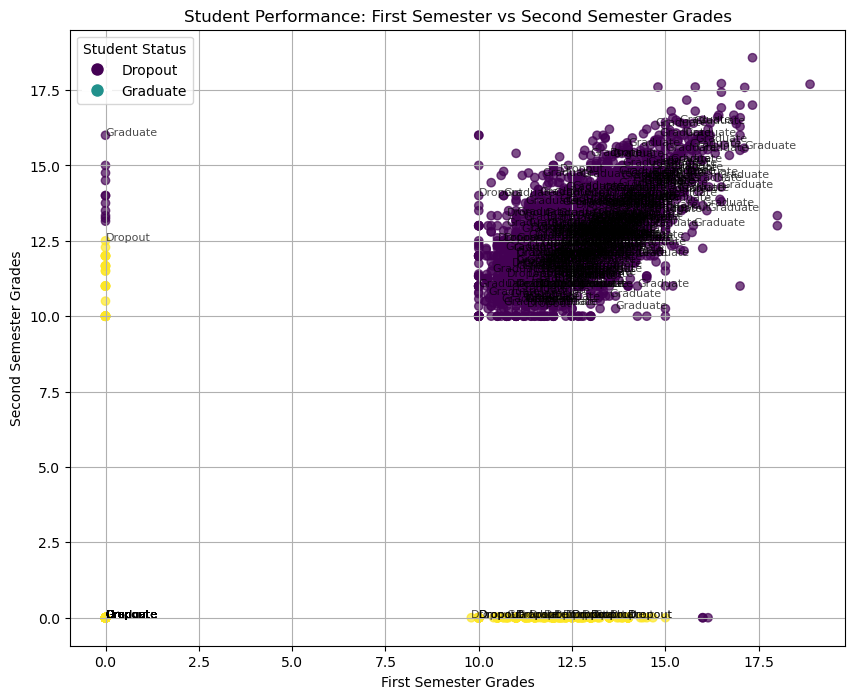


Cluster Statistics:

Cluster 0 (Dropout):
Curricular units 1st sem (grade)    12.712771
Curricular units 2nd sem (grade)    12.739217
dtype: float64

Cluster 1 (Graduate):
Curricular units 1st sem (grade)    2.505306
Curricular units 2nd sem (grade)    0.378566
dtype: float64


In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

# Filter the data to only include Dropout and Graduate students
df_filtered = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Select the two grade columns for visualization
grade_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Perform K-means clustering (2 clusters now)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_filtered[grade_columns])

# Create a mapping of cluster numbers to meaningful labels
cluster_labels = {
    0: 'Dropout',
    1: 'Graduate'
}

# Create the scatter plot with labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_filtered[grade_columns[0]],  # First semester grades
                     df_filtered[grade_columns[1]],  # Second semester grades
                     c=clusters,
                     cmap='viridis',
                     alpha=0.7)

# Add labels to each point (only for a subset to avoid overcrowding)
for i, txt in enumerate(df_filtered['Target']):
    if i % 10 == 0:  # Only label every 10th point
        plt.annotate(txt, (df_filtered[grade_columns[0]].iloc[i], 
                          df_filtered[grade_columns[1]].iloc[i]), 
                    fontsize=8, alpha=0.7)

plt.title('Student Performance: First Semester vs Second Semester Grades')
plt.xlabel('First Semester Grades')
plt.ylabel('Second Semester Grades')

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=plt.cm.viridis(i/2), 
                             label=label, markersize=10)
                  for i, label in cluster_labels.items()]
plt.legend(handles=legend_elements, title='Student Status')

plt.grid(True)
plt.show()

# Print cluster statistics
print("\nCluster Statistics:")
for cluster in range(2):  # Now only 2 clusters
    print(f"\nCluster {cluster} ({cluster_labels[cluster]}):")
    cluster_data = df_filtered[clusters == cluster]
    print(cluster_data[grade_columns].mean())

PUT GRADES TOGETHER AND TO SEE 
DO A CLUSTER WITH ALL OF THEM (BASED ON ACADEMIC PERFORMACE)
AVERAGE VALUES 
ELBOW STRATEGIE 

classification report for naive bayes 

Nationality Filtering Information:
Original number of nationalities: 21
Number of nationalities with ≥5 students: 6
Nationalities removed: 15

Valid Nationalities and their counts:
Nacionality
1     4314
41      38
26      14
22      13
6       13
24       5
Name: count, dtype: int64

Detailed Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.63      0.68       401
    Graduate       0.85      0.91      0.88       919

    accuracy                           0.82      1320
   macro avg       0.80      0.77      0.78      1320
weighted avg       0.82      0.82      0.82      1320



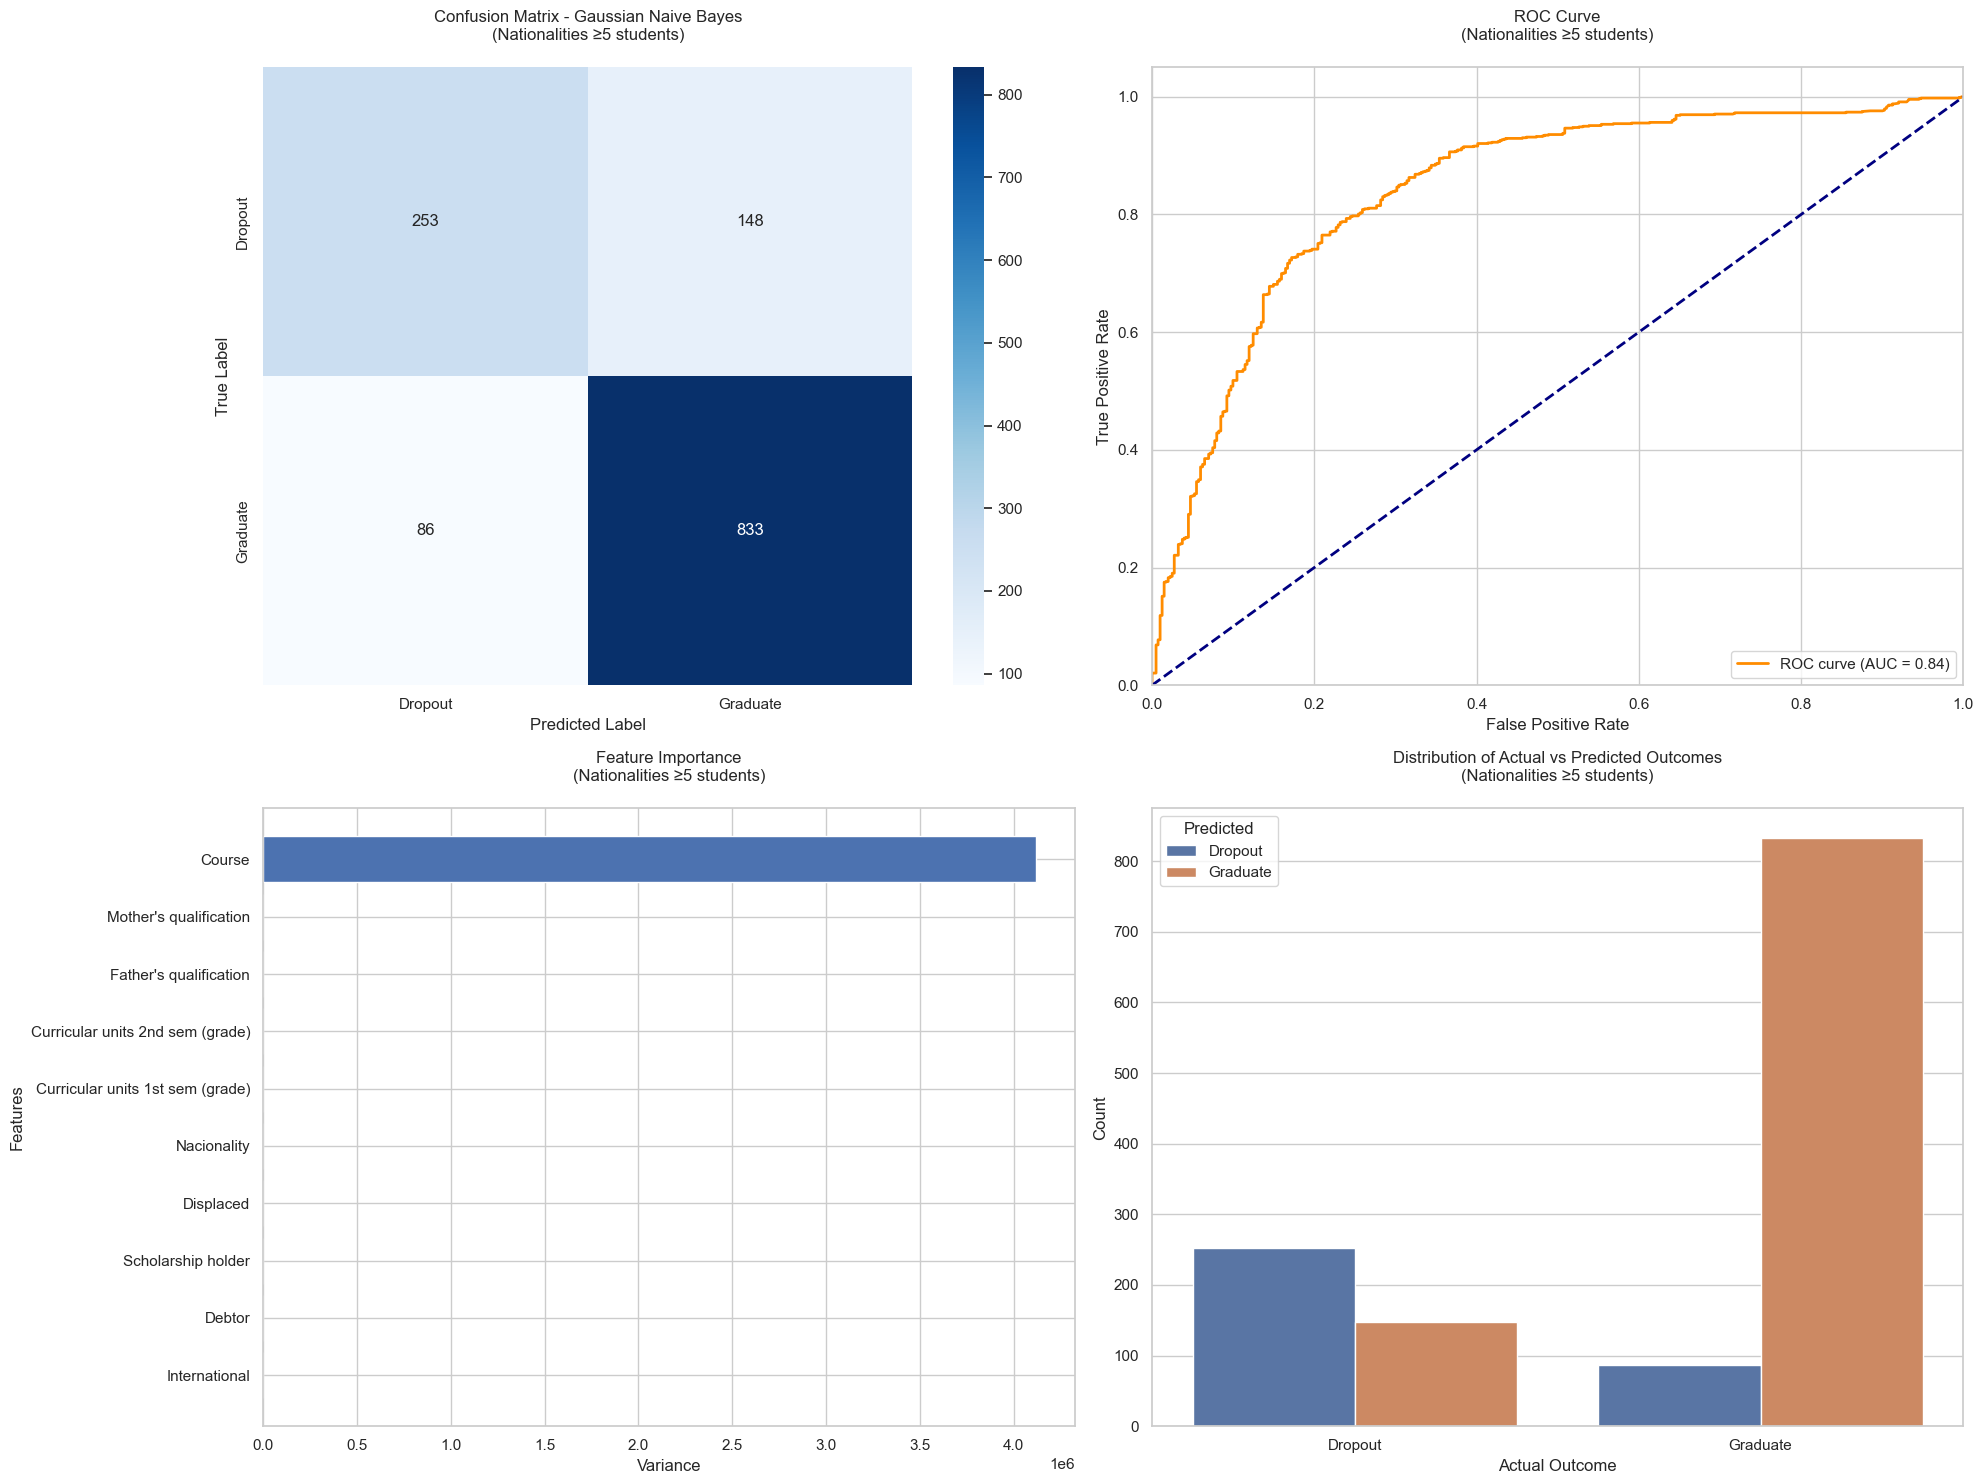


Additional Statistics (Filtered Dataset):
Total number of students analyzed: 4397
Training set size: 3077
Testing set size: 1320

Cross-validation scores: [0.83181818 0.82272727 0.79180887 0.81001138 0.81001138]
Average CV score: 0.813 (+/- 0.027)

Detailed Feature Importance Analysis:
                                                           Feature  \
Course                                                      Course   
Mother's qualification                      Mother's qualification   
Father's qualification                      Father's qualification   
Curricular units 2nd sem (grade)  Curricular units 2nd sem (grade)   
Curricular units 1st sem (grade)  Curricular units 1st sem (grade)   
Nacionality                                            Nacionality   
Displaced                                                Displaced   
Scholarship holder                              Scholarship holder   
Debtor                                                      Debtor   
Internationa

In [20]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

# Filter out nationalities with fewer than 5 students
nationality_counts = df_cleaned['Nacionality'].value_counts()
valid_nationalities = nationality_counts[nationality_counts >= 5].index
df_cleaned = df_cleaned[df_cleaned['Nacionality'].isin(valid_nationalities)]

# Print nationality filtering information
print("Nationality Filtering Information:")
print(f"Original number of nationalities: {len(nationality_counts)}")
print(f"Number of nationalities with ≥5 students: {len(valid_nationalities)}")
print(f"Nationalities removed: {len(nationality_counts) - len(valid_nationalities)}")
print("\nValid Nationalities and their counts:")
print(nationality_counts[valid_nationalities])

# Filter the data to only include Dropout and Graduate students
df_filtered = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Select features for the model
features = [
    'Scholarship holder',
    'Course',
    'Nacionality',
    'International',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Debtor',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]

# Prepare the data
X = df_filtered[features]
y = df_filtered['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# 1. Enhanced Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Graduate'],
            yticklabels=['Dropout', 'Graduate'])
plt.title('Confusion Matrix - Gaussian Naive Bayes\n(Nationalities ≥5 students)', pad=20)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. ROC Curve
plt.subplot(2, 2, 2)
y_test_bin = label_binarize(y_test, classes=['Dropout', 'Graduate'])
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\n(Nationalities ≥5 students)', pad=20)
plt.legend(loc="lower right")

# 3. Feature Importance Plot
plt.subplot(2, 2, 3)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.var(X_train, axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance\n(Nationalities ≥5 students)', pad=20)
plt.xlabel('Variance')
plt.ylabel('Features')

# 4. Distribution of Predictions
plt.subplot(2, 2, 4)
prediction_dist = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
sns.countplot(data=prediction_dist, x='Actual', hue='Predicted')
plt.title('Distribution of Actual vs Predicted Outcomes\n(Nationalities ≥5 students)', pad=20)
plt.xlabel('Actual Outcome')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print additional statistics
print("\nAdditional Statistics (Filtered Dataset):")
print(f"Total number of students analyzed: {len(df_filtered)}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Cross-validation scores
cv_scores = cross_val_score(gnb, X, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Print detailed feature importance
print("\nDetailed Feature Importance Analysis:")
feature_stats = pd.DataFrame({
    'Feature': features,
    'Variance': np.var(X_train, axis=0),
    'Mean': np.mean(X_train, axis=0),
    'Std': np.std(X_train, axis=0)
})
print(feature_stats.sort_values('Variance', ascending=False))

# Print class distribution
print("\nClass Distribution:")
print(df_filtered['Target'].value_counts(normalize=True).round(3))

# Additional nationality-specific analysis
print("\nDropout rates by nationality (≥5 students):")
nationality_stats = pd.crosstab(df_filtered['Nacionality'], df_filtered['Target'], normalize='index') * 100
nationality_stats['Total_Students'] = df_filtered['Nacionality'].value_counts()
nationality_stats = nationality_stats.sort_values('Dropout', ascending=False)
print(nationality_stats.round(2))


Okay, let's break down each of these graphs:

1.  **Confusion Matrix (Top-Left):**
    *   **Purpose:** This shows how well the model's predictions matched the actual outcomes (True Labels).
    *   **Axes:**
        *   `True Label` (Y-axis): What the student actually did (Dropout or Graduate).
        *   `Predicted Label` (X-axis): What the model predicted the student would do.
    *   **Interpretation:**
        *   **Top-Left (278):** These are students who actually **Dropped out**, and the model correctly predicted they would **Dropout** (True Positives for Dropout).
        *   **Top-Right (163):** These are students who actually **Dropped out**, but the model incorrectly predicted they would **Graduate** (False Negatives for Dropout / False Positives for Graduate).
        *   **Bottom-Left (83):** These are students who actually **Graduated**, but the model incorrectly predicted they would **Dropout** (False Positives for Dropout / False Negatives for Graduate).
        *   **Bottom-Right (804):** These are students who actually **Graduated**, and the model correctly predicted they would **Graduate** (True Negatives for Dropout / True Positives for Graduate).
    *   **Overall:** The model seems better at correctly identifying Graduates (804 correct) than Dropouts (278 correct). It also misclassifies a notable number of actual Dropouts as Graduates (163).

2.  **Receiver Operating Characteristic (ROC) Curve (Top-Right):**
    *   **Purpose:** This shows how well the model can distinguish between the two classes (Dropout vs. Graduate) at various probability thresholds.
    *   **Axes:**
        *   `False Positive Rate` (X-axis): The proportion of Graduates incorrectly predicted as Dropouts.
        *   `True Positive Rate` (Y-axis): The proportion of Dropouts correctly predicted as Dropouts (also called Sensitivity or Recall).
    *   **Interpretation:**
        *   **Orange Curve:** Represents the performance of your Naive Bayes model. The further the curve is towards the top-left corner, the better the model's ability to distinguish classes.
        *   **Dashed Blue Line:** Represents a model that guesses randomly. A good model should be well above this line.
        *   **AUC = 0.84:** The Area Under the Curve is 0.84. AUC ranges from 0.5 (random guessing) to 1.0 (perfect classification). An AUC of 0.84 indicates a good level of discrimination – the model is quite capable of distinguishing between students who will drop out and those who will graduate.

3.  **Feature Importance (Based on Variance) (Bottom-Left):**
    *   **Purpose:** This attempts to show which input features (like 'Course', 'Nationality', etc.) had the most variability in the training data. For Naive Bayes, features with higher variance *can sometimes* be more influential, although this isn't a perfect measure of importance.
    *   **Axes:**
        *   `Features` (Y-axis): The different input variables used in the model.
        *   `Variance` (X-axis): A measure of how spread out the values are for each feature.
    *   **Interpretation:**
        *   `Course` has the highest variance by far, followed by `Mother's qualification`, `Father's qualification`, and `Nacionality`. This suggests these features have a wide range of values in the dataset.
        *   Features like `International`, `Debtor`, `Scholarship holder`, and `Displaced` have very low variance, meaning most students had the same or very similar values for these features.
        *   **Caution:** While high variance might suggest importance, it doesn't guarantee it. A feature could vary a lot but not be strongly related to the outcome.

4.  **Distribution of Actual vs Predicted Outcomes (Bottom-Right):**
    *   **Purpose:** This visually compares the model's predictions against the actual outcomes for the test set.
    *   **Axes:**
        *   `Actual Outcome` (X-axis): Shows the two groups - students who actually Dropped out and those who actually Graduated.
        *   `Count` (Y-axis): The number of students.
    *   **Interpretation:**
        *   **Left Group (Actual Dropout):**
            *   The taller blue bar shows the number of actual Dropouts correctly predicted as Dropout.
            *   The shorter orange bar shows the number of actual Dropouts incorrectly predicted as Graduate.
        *   **Right Group (Actual Graduate):**
            *   The very tall orange bar shows the number of actual Graduates correctly predicted as Graduate.
            *   The very short blue bar shows the number of actual Graduates incorrectly predicted as Dropout.
    *   **Overall:** This confirms what the confusion matrix showed: the model predicts 'Graduate' correctly much more often than it predicts 'Dropout' correctly. It makes more errors by predicting 'Graduate' for students who actually dropped out.


Value counts in Target_numerical:
Target_numerical
1    3003
0    1421
Name: count, dtype: int64
Dataset Overview:
--------------------
Number of rows: 4424
Number of columns: 38

Data Types:
--------------------
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                        

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


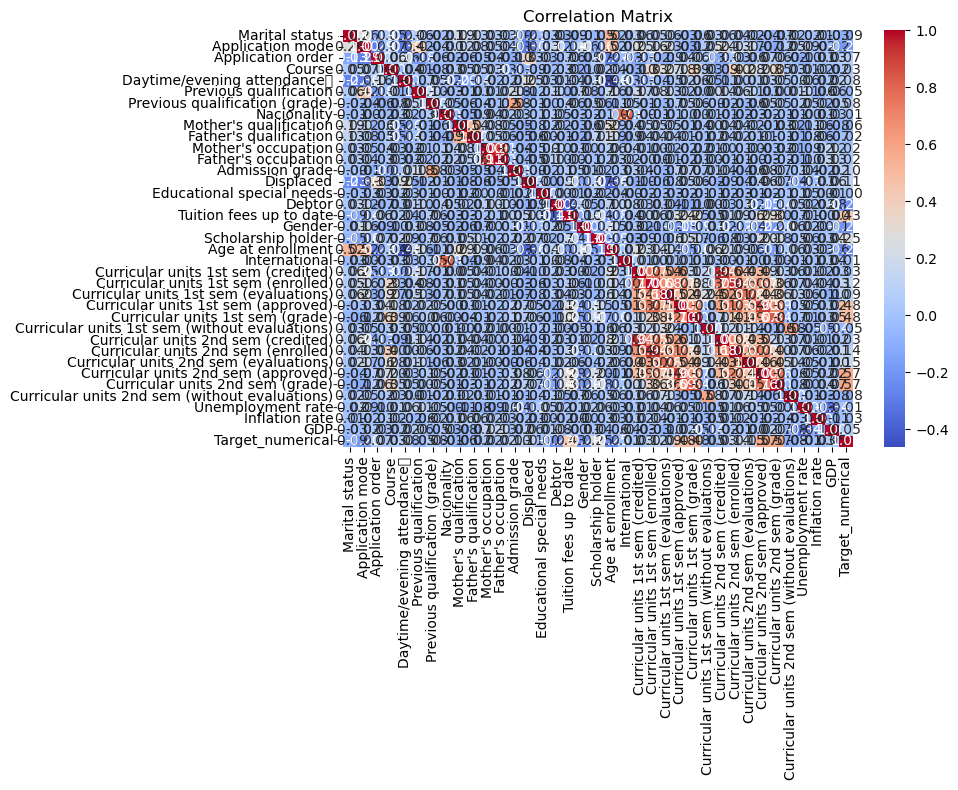

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('cleaned_data.csv')

# Create the Target_numerical column
target_mapping = {
    'Dropout': 0,
    'Graduate': 1
}
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("Value counts in Target_numerical:")
print(df['Target_numerical'].value_counts())

def dataset_overview(df):
    # Basic information
    print("Dataset Overview:")
    print("-" * 20)
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    # Data types
    print("\nData Types:")
    print("-" * 20)
    print(df.dtypes)
    
    # Missing values
    print("\nMissing Values:")
    print("-" * 20)
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(missing_values[missing_values > 0])
    else:
        print("No missing values in the dataset")
    
    # Correlations
    print("\nCorrelations:")
    print("-" * 20)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlations = df[numeric_cols].corr()['Target_numerical'].sort_values(ascending=False)
    print("\nTop correlations with student outcome:")
    print(correlations.head())
    
    # Target distribution
    print("\nTarget Distribution:")
    print("-" * 20)
    print(df['Target'].value_counts(normalize=True) * 100)
    
    # Visualize correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# Run the analysis
dataset_overview(df)

Short list best models?




Analyze the most significant variables for each algorithm

Have another round of feature selection and engineering

Double-click (or enter) to edit

